In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [4]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')

In [5]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [6]:
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [7]:
print('Training the model here...')
sgd = SGD(0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=128)

Training the model here...
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 28us/step - loss: 1.8093 - acc: 0.5798 - val_loss: 1.3759 - val_acc: 0.7549
Epoch 2/100
60000/60000 [==============================] - 2s 25us/step - loss: 1.1096 - acc: 0.8039 - val_loss: 0.8760 - val_acc: 0.8439
Epoch 3/100
60000/60000 [==============================] - 1s 25us/step - loss: 0.7550 - acc: 0.8559 - val_loss: 0.6360 - val_acc: 0.8721
Epoch 4/100
60000/60000 [==============================] - 2s 25us/step - loss: 0.5789 - acc: 0.8778 - val_loss: 0.5136 - val_acc: 0.8884
Epoch 5/100
60000/60000 [==============================] - 2s 25us/step - loss: 0.4805 - acc: 0.8911 - val_loss: 0.4384 - val_acc: 0.8963
Epoch 6/100
60000/60000 [==============================] - 2s 25us/step - loss: 0.4183 - acc: 0.9004 - val_loss: 0.3901 - val_acc: 0.9042
Epoch 7/100
60000/60000 [==============================] - 2s 25us/step - loss: 0.3753 - acc: 0

In [8]:
print('Testing the model.. ')
score = model.evaluate(X_test, y_test,verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Testing the model.. 
10000/10000 [==============================] - 0s 28us/step
Test score: 0.134469467293
Test accuracy: 0.9582


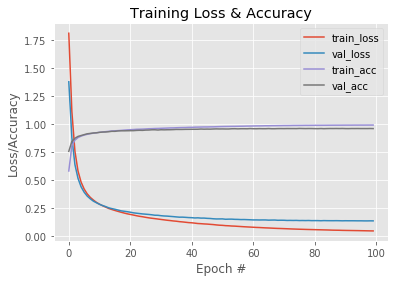

In [9]:
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, 100), hist.history['loss'], label='train_loss')
plt.plot(np.arange(0, 100), hist.history['val_loss'], label='val_loss')
plt.plot(np.arange(0, 100), hist.history['acc'], label='train_acc')
plt.plot(np.arange(0, 100), hist.history['val_acc'], label='val_acc')
plt.title('Training Loss & Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()